In [1]:
import numpy as np
import pandas as pd

In [2]:
print("helo")

helo


In [3]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

2024-03-29 05:17:42.629393: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 05:17:42.629494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 05:17:42.757013: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.15.0


In [4]:
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [5]:
from tensorflow.keras import Sequential

In [6]:
df = pd.read_csv("/kaggle/input/emoji-data/emoji_uncleaned.csv")

In [7]:
df

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2
...,...,...
49995,My #O2otd Love this chain so much and our new ...,1
49996,Met Santa and Olaf @ the North Pole today @ No...,0
49997,New York by Night Strideby #HERElocationNYC......,11
49998,Kisses for the birthday girl! @ Helzberg Diamonds,0


## Preproccessing

In [8]:
df.info()
# => no null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   50000 non-null  object
 1   Label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [9]:
df['Tweet'][0]

'A little throwback with my favourite person @ Water Wall'

In [10]:
# unnecessary = ["@", "#", "\\"]
necessary = [".", ",", "!", "?"]
def r_unnecessary1(line):
    nline = ""
    line = line.split()
#     line = ['sejbsgr','sejgbsr','akbrgogir']
#     words = 'sejbsgr'
    for words in line:
        c = 0

        if(words[(len(words)-1)] in necessary):
            c = 2
        elif(words[0] in necessary):
            c = 1
        if(c == 1):
            nline += words[0] + " " + words[1:len(words)] + " "
        if(c == 2):
            nline += words[0:(len(words) - 1)] + " " + words[(len(words) - 1)] + " "
        if(c == 0):
            nline += words + " "
    return nline

In [11]:
def r_unnecessary2(line):
    nline = ""
    line = line.split()
#     line = ['sejbsgr','sejgbsr','akbrgogir']
#     words = 'sejbsgr'
    for words in line:
        if(words[0] == "#"):
            nline += words[1:len(words)] + " "
        else:
            nline += words + " "
    return nline

In [12]:
r_unnecessary1("okay, guys, how are we feeling today .I am #good !!!!!!!!")

'okay , guys , how are we feeling today . I am #good !!!!!!! ! '

In [13]:
# unnecessary = ["@", "#", "\\"]
# necessary = [".", ",", "!", "?"]
# def r_unnecessary2(line):
#     nline = ""
#     line = line.split()
#     for words in line:
#         if((words.isalpha() == False) and (words in necessary)):
#             nline += words + " "
#         elif((words.isalpha() == False) and (words not in necessary)):
#             continue
#         else:
#             words = words.lower()
#             nline += words + " "
#     return nline

In [14]:
r_unnecessary2("#love #you")

'love you '

In [15]:
df['Tweet'][0]

'A little throwback with my favourite person @ Water Wall'

In [16]:
wo = "0123456"
wo[0:3]

'012'

In [17]:
df['Tweet'] = df['Tweet'].apply(r_unnecessary1)

In [18]:
df['Tweet'] = df['Tweet'].apply(r_unnecessary2)

In [19]:
df['Tweet']

0        A little throwback with my favourite person @ ...
1        glam on @user yesterday for kcon makeup using ...
2        Democracy Plaza in the wake of a stunning outc...
3        Then &amp; Now . VILO @ Walt Disney Magic King...
4                   Who never.. . @ A Galaxy Far Far Away 
                               ...                        
49995    My O2otd Love this chain so much and our new r...
49996    Met Santa and Olaf @ the North Pole today @ No...
49997    New York by Night Strideby HERElocationNYC.......
49998    Kisses for the birthday girl ! @ Helzberg Diam...
49999    Dinner with this priceless view!Thank you , S ...
Name: Tweet, Length: 50000, dtype: object

In [20]:
import re
def remove_non_alphabetic(text):
    # Replace non-alphabetic characters with a space
    cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

df['Tweet'] = df['Tweet'].apply(remove_non_alphabetic)

In [21]:
remove_non_alphabetic("okay , guys , how are we feeling today . I am #good ! !!!!!!! ")

'okay guys how are we feeling today i am good '

In [22]:
# df['Tweet'] = df['Tweet'].apply(r_unnecessary2)

In [23]:
df['Tweet']

0        a little throwback with my favourite person wa...
1        glam on user yesterday for kcon makeup using u...
2        democracy plaza in the wake of a stunning outc...
3             then amp now vilo walt disney magic kingdom 
4                         who never a galaxy far far away 
                               ...                        
49995    my o otd love this chain so much and our new r...
49996    met santa and olaf the north pole today north ...
49997    new york by night strideby herelocationnyc see...
49998      kisses for the birthday girl helzberg diamonds 
49999    dinner with this priceless view thank you s an...
Name: Tweet, Length: 50000, dtype: object

In [24]:
!pip install nltk

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
s_words = stopwords.words('english')

In [27]:
s_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
df['Tweet']

0        a little throwback with my favourite person wa...
1        glam on user yesterday for kcon makeup using u...
2        democracy plaza in the wake of a stunning outc...
3             then amp now vilo walt disney magic kingdom 
4                         who never a galaxy far far away 
                               ...                        
49995    my o otd love this chain so much and our new r...
49996    met santa and olaf the north pole today north ...
49997    new york by night strideby herelocationnyc see...
49998      kisses for the birthday girl helzberg diamonds 
49999    dinner with this priceless view thank you s an...
Name: Tweet, Length: 50000, dtype: object

In [29]:
df.isnull().sum()

Tweet    0
Label    0
dtype: int64

In [30]:
df['Label'].value_counts()

Label
0     10760
1      5279
2      5241
3      2885
4      2517
5      2317
6      2049
7      1894
8      1796
9      1671
10     1544
11     1528
12     1462
14     1377
13     1346
16     1306
18     1286
17     1279
15     1249
19     1214
Name: count, dtype: int64

In [31]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

unbalanced dataset

In [32]:
X = df['Tweet'].values
Y = df['Label'].values             #value returns a numpy array

In [33]:
X

array(['a little throwback with my favourite person water wall ',
       'glam on user yesterday for kcon makeup using user in featherette ',
       'democracy plaza in the wake of a stunning outcome decision nbc news ',
       ...,
       'new york by night strideby herelocationnyc seemycity guardiancities ',
       'kisses for the birthday girl helzberg diamonds ',
       'dinner with this priceless view thank you s anniversarydinner columbuscircle august rd '],
      dtype=object)

In [34]:
X.shape

(49863,)

In [35]:
Y.shape

(49863,)

In [36]:
!pip install imblearn

In [37]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, Y = os.fit_resample(X, Y)

In [38]:
X.shape

(214440, 1)

In [39]:
X = X.reshape(-1,)
X.shape

(214440,)

In [40]:
all_names = ''
for name in df['Tweet']:
    all_names += name

In [41]:
b = {}
for words in df['Tweet']:
    for word in words:
        b[word] = b.get(word,0)+1

In [42]:
sorted(b.items(), key = lambda kv: -kv[1])

[(' ', 542976),
 ('e', 276882),
 ('a', 220040),
 ('t', 205043),
 ('o', 199327),
 ('i', 184718),
 ('s', 174548),
 ('n', 163659),
 ('r', 161486),
 ('l', 122796),
 ('h', 115707),
 ('u', 86605),
 ('d', 83627),
 ('m', 82390),
 ('y', 78774),
 ('c', 73907),
 ('g', 63766),
 ('p', 53809),
 ('f', 52827),
 ('w', 52164),
 ('b', 50175),
 ('k', 36440),
 ('v', 30794),
 ('j', 6966),
 ('x', 5469),
 ('z', 4801),
 ('q', 2328)]

there are weird words but they very less in quantity compared to 70000, so it wont make much difference, could have removed them using alpha function but that would have removed

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word2index = tokenizer.word_index

In [44]:
# # tokenizer_config = tokenizer.to_json
# import pickle

# # Save the tokenizer
# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [45]:
word2index

{'the': 1,
 'user': 2,
 'i': 3,
 'to': 4,
 'my': 5,
 'a': 6,
 'in': 7,
 'you': 8,
 's': 9,
 'and': 10,
 'of': 11,
 'for': 12,
 'with': 13,
 'this': 14,
 'it': 15,
 'at': 16,
 'is': 17,
 'love': 18,
 'new': 19,
 'on': 20,
 'me': 21,
 't': 22,
 'we': 23,
 'day': 24,
 'amp': 25,
 'so': 26,
 'happy': 27,
 'be': 28,
 'christmas': 29,
 'beach': 30,
 'all': 31,
 'from': 32,
 'that': 33,
 'was': 34,
 'm': 35,
 'your': 36,
 'out': 37,
 'good': 38,
 'night': 39,
 'by': 40,
 'time': 41,
 'york': 42,
 'just': 43,
 'today': 44,
 'one': 45,
 'park': 46,
 'are': 47,
 'up': 48,
 'have': 49,
 'our': 50,
 'university': 51,
 'but': 52,
 'when': 53,
 'best': 54,
 'like': 55,
 'city': 56,
 'can': 57,
 'got': 58,
 'last': 59,
 'get': 60,
 'california': 61,
 'what': 62,
 'thanks': 63,
 'great': 64,
 'little': 65,
 'birthday': 66,
 'back': 67,
 'see': 68,
 'beautiful': 69,
 'here': 70,
 'these': 71,
 'not': 72,
 'life': 73,
 'some': 74,
 'center': 75,
 'school': 76,
 'fun': 77,
 'tonight': 78,
 'first': 79,
 

In [46]:
len(word2index)

54628

In [47]:
x_tokens = tokenizer.texts_to_sequences(X)
x_tokens

[[6, 65, 421, 13, 5, 2291, 433, 707, 971],
 [2964, 20, 2, 294, 12, 21094, 651, 1719, 2, 7, 21095],
 [4379, 696, 7, 1, 1097, 11, 6, 1293, 9033, 3914, 4131, 1363],
 [496, 25, 90, 43697, 614, 133, 247, 423],
 [103, 150, 6, 2890, 794, 794, 562],
 [218,
  7,
  14087,
  78,
  3518,
  10787,
  3025,
  216,
  43698,
  7556,
  2000,
  2084,
  218,
  94,
  3025],
 [15, 9, 5, 533, 2495, 59, 190, 600, 20, 6601, 213, 213, 2292],
 [3, 58, 4, 4, 86, 1041, 13, 5, 54, 129, 1029, 3375, 16, 21096],
 [537, 3, 159, 5, 65, 1659, 421, 7040, 556, 51],
 [66, 1550, 744, 812],
 [64, 41, 7, 4986, 13, 5, 115, 2140, 2400, 166],
 [6,
  18276,
  18277,
  1729,
  18278,
  835,
  230,
  10073,
  623,
  523,
  1601,
  301,
  279,
  2313,
  7,
  1210,
  217,
  217],
 [35046, 6405, 696, 30, 303],
 [7, 1468, 12, 36, 73, 4, 28, 64, 8, 1222, 79, 1683, 4, 1463, 15, 217],
 [71, 177, 2495, 768, 43699, 1, 3275],
 [38963, 195, 205, 610, 30, 557, 2258, 2358, 1880, 20, 1, 30],
 [103, 5422, 33, 15, 9, 7041, 287, 3, 35, 148, 501, 704

In [48]:
maxlen = 0
for sent in x_tokens:
    maxlen = max(maxlen, len(sent))

In [49]:
maxlen

34

In [50]:
from tensorflow.keras.utils import pad_sequences
x = pad_sequences(x_tokens,maxlen, padding = 'pre')

In [51]:
x[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    6,   65,  421,   13,    5, 2291,  433,  707,
        971], dtype=int32)

In [52]:
df.duplicated().sum()

0

In [53]:
df.shape

(49863, 2)

In [54]:
x.shape

(214440, 34)

In [55]:
Y.shape

(214440,)

In [56]:
x

array([[    0,     0,     0, ...,   433,   707,   971],
       [    0,     0,     0, ...,     2,     7, 21095],
       [    0,     0,     0, ...,  3914,  4131,  1363],
       ...,
       [    0,     0,     0, ...,  1155,  1957,  3609],
       [    0,     0,     0, ...,  2486,  1086,    30],
       [    0,     0,     0, ...,  7546,  2280,  1846]], dtype=int32)

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,train_size=0.8,random_state = 42)
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=1, train_size=0.8,random_state = 42)

# for train_index, test_index in sss.split(x, Y):
#     x_train, x_test = x[train_index], x[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]

In [58]:
y_test

array([ 1, 19,  3, ..., 16,  6, 17])

In [59]:
class_counts = np.bincount(y_test)
class_counts

array([2080, 2099, 2112, 2119, 2144, 2182, 2066, 2158, 2199, 2175, 2094,
       2121, 2090, 2156, 2222, 2213, 2138, 2209, 2141, 2170])

## we will adjust the loss function to penalize misclassification of the minority class more

## introducing class weights

In [60]:
# from sklearn.utils.class_weight import compute_class_weight

# # Compute class weights
# class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)


In [61]:
# class_weights

In [62]:
# class with less frequency will have higher weight

In [109]:
# one hot encoding of Y
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [110]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [65]:
x_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     2,    17,
         225,     4, 16795,     4,    68,    21,   621], dtype=int32)

## glove embedding

In [66]:
# file = open('glove.twitter.27B.100d.txt', 'r', encoding  = 'utf8')
# content = file.readlines()
# file.close()

In [67]:
# content

In [68]:
# embeddings = {}
# for line in content:
#     line = line.split()
#     embeddings[line[0]] = np.array(line[1:],dtype = float)

In [69]:
# embedding_matrix = np.zeros((len(word2index)+1,100))

# for word,token in word2index.items():
#     if(word in embeddings):
#         embed_vector = embeddings[word]
#         embedding_matrix[token] = embed_vector

In [70]:
import pickle
file_path = '/kaggle/input/emoji-data/emb_matrix_100_f.pickle'

# Open the pickled file in binary mode and read the contents
with open(file_path, 'rb') as f:
    embedding_matrix = pickle.load(f)

In [71]:
embedding_matrix

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.095152 ,  0.37024  ,  0.54291  , ..., -0.51083  ,  0.46877  ,
         0.34882  ],
       [ 0.53558  , -0.0025307, -0.60355  , ..., -0.10917  ,  0.26724  ,
         0.38322  ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.37068  ,  0.4443   ,  0.23452  , ...,  0.42967  , -0.068717 ,
         0.62313  ],
       [-0.2253   ,  0.49861  ,  1.197    , ...,  0.39069  ,  0.32672  ,
         0.13411  ]])

In [72]:
embedding_matrix.shape

(54629, 100)

In [73]:
zero_1d = np.zeros(100)

In [74]:
zero_1d

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [75]:
c = 0
l=[]
for i in range(len(embedding_matrix)):
    if (np.array_equal(embedding_matrix[i], zero_1d)):
        l.append(i)
        c += 1
c

24430

In [76]:
len(word2index)

54628

In [77]:
# lets ignore the unembeddedn vector as they will be useless anyway because aur vocab is so vast that every useful word has been embedded

In [78]:
# import pickle

# # Save the tokenizer
# with open('emb_mat50.pickle', 'wb') as handle:
#     pickle.dump(embedding_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [79]:
maxlen

34

In [80]:
embed_size = 100

In [81]:
from tensorflow.keras.layers import Embedding, SimpleRNN,Bidirectional,GlobalMaxPool1D

In [82]:
import tensorflow

In [83]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [84]:
model = Sequential()

# model.add(Embedding(input_dim = len(word2index) + 1,
#               output_dim = embed_size,
#               input_length = maxlen,
#               weights = [embedding_matrix]
#               ))

model.add(Embedding(len(word2index)+1, embed_size))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="softmax"))

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])



In [85]:
batch_size=64
# class_weight_dict = dict(enumerate(class_weights))

model.fit(x_train, y_train, batch_size=batch_size, epochs = 3,
          shuffle=True,validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/3


NotFoundError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/local/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/local/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/usr/local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/usr/local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/local/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/local/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/usr/local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/usr/local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/usr/local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/usr/local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/usr/local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_13/2031752089.py", line 4, in <module>

  File "/usr/local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 118, in error_handler

  File "/usr/local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 323, in fit

  File "/usr/local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

could not find registered transfer manager for platform Host -- check target linkage
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_8050]

In [ ]:
model5 = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
              ),
    Bidirectional(LSTM(units = 100, return_sequences = True)),    #when it is true, it returns value at every time stamps
    Bidirectional(LSTM(units = 100, return_sequences = True)),
    Bidirectional(LSTM(units = 50)),        #using another layer stacks another cell in top of the previous one where the output of the bottom cell is taken as an input by the the cell above anf thus we need bottom cell to return output at every time stamp
    Dense(64, activation="relu"),
    Dense(20,activation = 'softmax')
])

class_weight_dict = dict(enumerate(class_weights))


model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [2]:
physical_devices = tensorflow.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    print("GPU is available")
    for device in physical_devices:
        print(device)
else:
    print("No GPU available, using CPU")

NameError: name 'tensorflow' is not defined

In [ ]:
model.fit(x_train,y_train,epochs = 10,class_weight = class_weight_dict)
# model2.fit(x_train,y_train,epochs = 20,class_weight = class_weight_dict)
# model3.fit(x_train,y_train,epochs = 20,class_weight = class_weight_dict)
# model4.fit(x_train,y_train,epochs = 20,class_weight = class_weight_dict)
model5.fit(x_train,y_train,epochs = 10,class_weight = class_weight_dict)



In [ ]:
loss5 = pd.DataFrame(model5.history.history)
loss1 = pd.DataFrame(model.history.history)
plt.plot(loss1['accuracy'],label = 'model1_loss')
plt.plot(loss5['accuracy'],label = 'model5_loss')
plt.legend()
plt.show()

# Hyperparameter tuning

In [94]:
# https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f
# https://www.youtube.com/watch?v=Clo1HKB50Ug
# https://www.tensorflow.org/tutorials/keras/keras_tuner

In [85]:
!pip install keras-tuner

In [86]:
import tensorflow as tf
from tensorflow import keras

In [87]:
import keras_tuner as kt

In [141]:
# model5 = Sequential([
#     Embedding(input_dim = len(word2index) + 1,
#               output_dim = embed_size,
#               input_length = maxlen,
#               weights = [embedding_matrix],
#               trainable = False
#               ),
#     Bidirectional(LSTM(units = 100, return_sequences = True)),    #when it is true, it returns value at every time stamps
#     Bidirectional(LSTM(units = 100, return_sequences = True)),
#     Bidirectional(LSTM(units = 50)),        #using another layer stacks another cell in top of the previous one where the output of the bottom cell is taken as an input by the the cell above anf thus we need bottom cell to return output at every time stamp
#     Dense(64, activation="relu"),
#     Dense(20,activation = 'softmax')
# ])

# def build_model(hp):
#     model7 = tf.keras.Sequential()
#     model7.add(Embedding(input_dim = len(word2index) + 1,
#               output_dim = embed_size,
#               input_length = maxlen,
#               weights = [embedding_matrix],
#               trainable = False
#               ))



def create_lstm_model(hp):
    model = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              )
    ])
    # Tune the number of units in the embedding layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    # model.add(Embedding(input_dim=len(word2index) + 1, output_dim=hp_units))

    # Tune the number of LSTM units and the number of LSTM layers
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        hp_lstm_units = hp.Int(f'lstm_units_{i+50}', min_value=32, max_value=512, step=32)
        model.add(Bidirectional(LSTM(units=hp_lstm_units, return_sequences=True)))

    model.add(Bidirectional(LSTM(units=hp_lstm_units)))

    # Tune the number of units in the dense layer
    hp_dense_dropout = hp.Float('dense_dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dense_dropout))
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(Dense(units=hp_units, activation=hp.Choice('dense_activation', values=['relu', 'sigmoid'])))
        model.add(Dropout(rate=hp_dense_dropout))

    # Output layer with softmax activation for multi-class classification
    model.add(Dense(20, activation='softmax'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [142]:
tuner = kt.Hyperband(create_lstm_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir3',
                     project_name='emoji_pred')

Reloading Tuner from my_dir3/emoji_pred/tuner0.json


In [143]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)
batch_size=65
# class_weight_dict = dict(enumerate(class_weights))

# model.fit(x_train, y_train, batch_size=batch_size, epochs = 5,
#           shuffle=True,validation_data=(x_test, y_test), callbacks=[early_stop])

In [144]:
tuner.search(x_train,y_train,epochs=10 ,batch_size=batch_size ,shuffle=True ,validation_data=(x_test,y_test), callbacks=[early_stop])

In [91]:
tuner.search(x_train,y_train,epochs=10 ,batch_size=batch_size ,shuffle=True ,validation_data=(x_test,y_test), callbacks=[early_stop])

Trial 30 Complete [00h 10m 59s]
val_accuracy: 0.920840322971344

Best val_accuracy So Far: 0.9373950958251953
Total elapsed time: 02h 27m 49s


In [93]:
tuner.results_summary()

Results summary
Results in my_dir3/emoji_pred
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0027 summary
Hyperparameters:
units: 416
num_lstm_layers: 1
lstm_units_0: 512
dense_dropout: 0.2
num_dense_layers: 1
dense_activation: sigmoid
lstm_units_1: 384
lstm_units_2: 128
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9373950958251953

Trial 0016 summary
Hyperparameters:
units: 512
num_lstm_layers: 1
lstm_units_0: 256
dense_dropout: 0.0
num_dense_layers: 1
dense_activation: relu
lstm_units_1: 288
lstm_units_2: 352
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.9355530738830566

Trial 0028 summary
Hyperparameters:
units: 352
num_lstm_layers: 1
lstm_units_0: 192
dense_dropout: 0.0
num_dense_layers: 2
dense_activation: relu
lstm_units_1: 288
lstm_units_2: 192
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9355530738830566

Trial 0024 summ

In [96]:
best_models = tuner.get_best_models(num_models=1)

In [97]:
best_models

[<Sequential name=sequential, built=True>]

In [98]:
model_tuned = best_models[0]

In [99]:
model_tuned

<Sequential name=sequential, built=True>

## Model Evaluation

In [115]:
model_tuned.evaluate(x_test, y_test)

1341/1341 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9351 - loss: 0.3034


[0.29971596598625183, 0.9373950958251953]

In [123]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model_tuned.predict(x_test)

1341/1341 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step


In [124]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [125]:
bread = np.argmax(predictions,axis = 1)
bread  #index is of flattened array if axis is not defined

array([ 9, 19,  3, ..., 16,  6, 17])

In [126]:
y_tasty = np.argmax(y_test,axis = 1)
y_tasty

array([ 1, 19,  3, ..., 16,  6, 17])

In [127]:
print(classification_report(y_tasty, bread))

              precision    recall  f1-score   support

           0       0.62      0.46      0.53      2080
           1       0.78      0.78      0.78      2099
           2       0.90      0.82      0.86      2112
           3       0.91      0.92      0.91      2119
           4       0.95      0.98      0.96      2144
           5       0.95      0.95      0.95      2182
           6       0.97      0.97      0.97      2066
           7       0.96      0.96      0.96      2158
           8       0.95      0.98      0.97      2199
           9       0.96      0.99      0.97      2175
          10       0.96      0.99      0.98      2094
          11       0.97      0.98      0.98      2121
          12       0.97      0.99      0.98      2090
          13       0.96      0.99      0.97      2156
          14       0.98      1.00      0.99      2222
          15       0.98      0.99      0.98      2213
          16       0.98      0.99      0.99      2138
          17       0.96    

In [128]:
!pip install seaborn

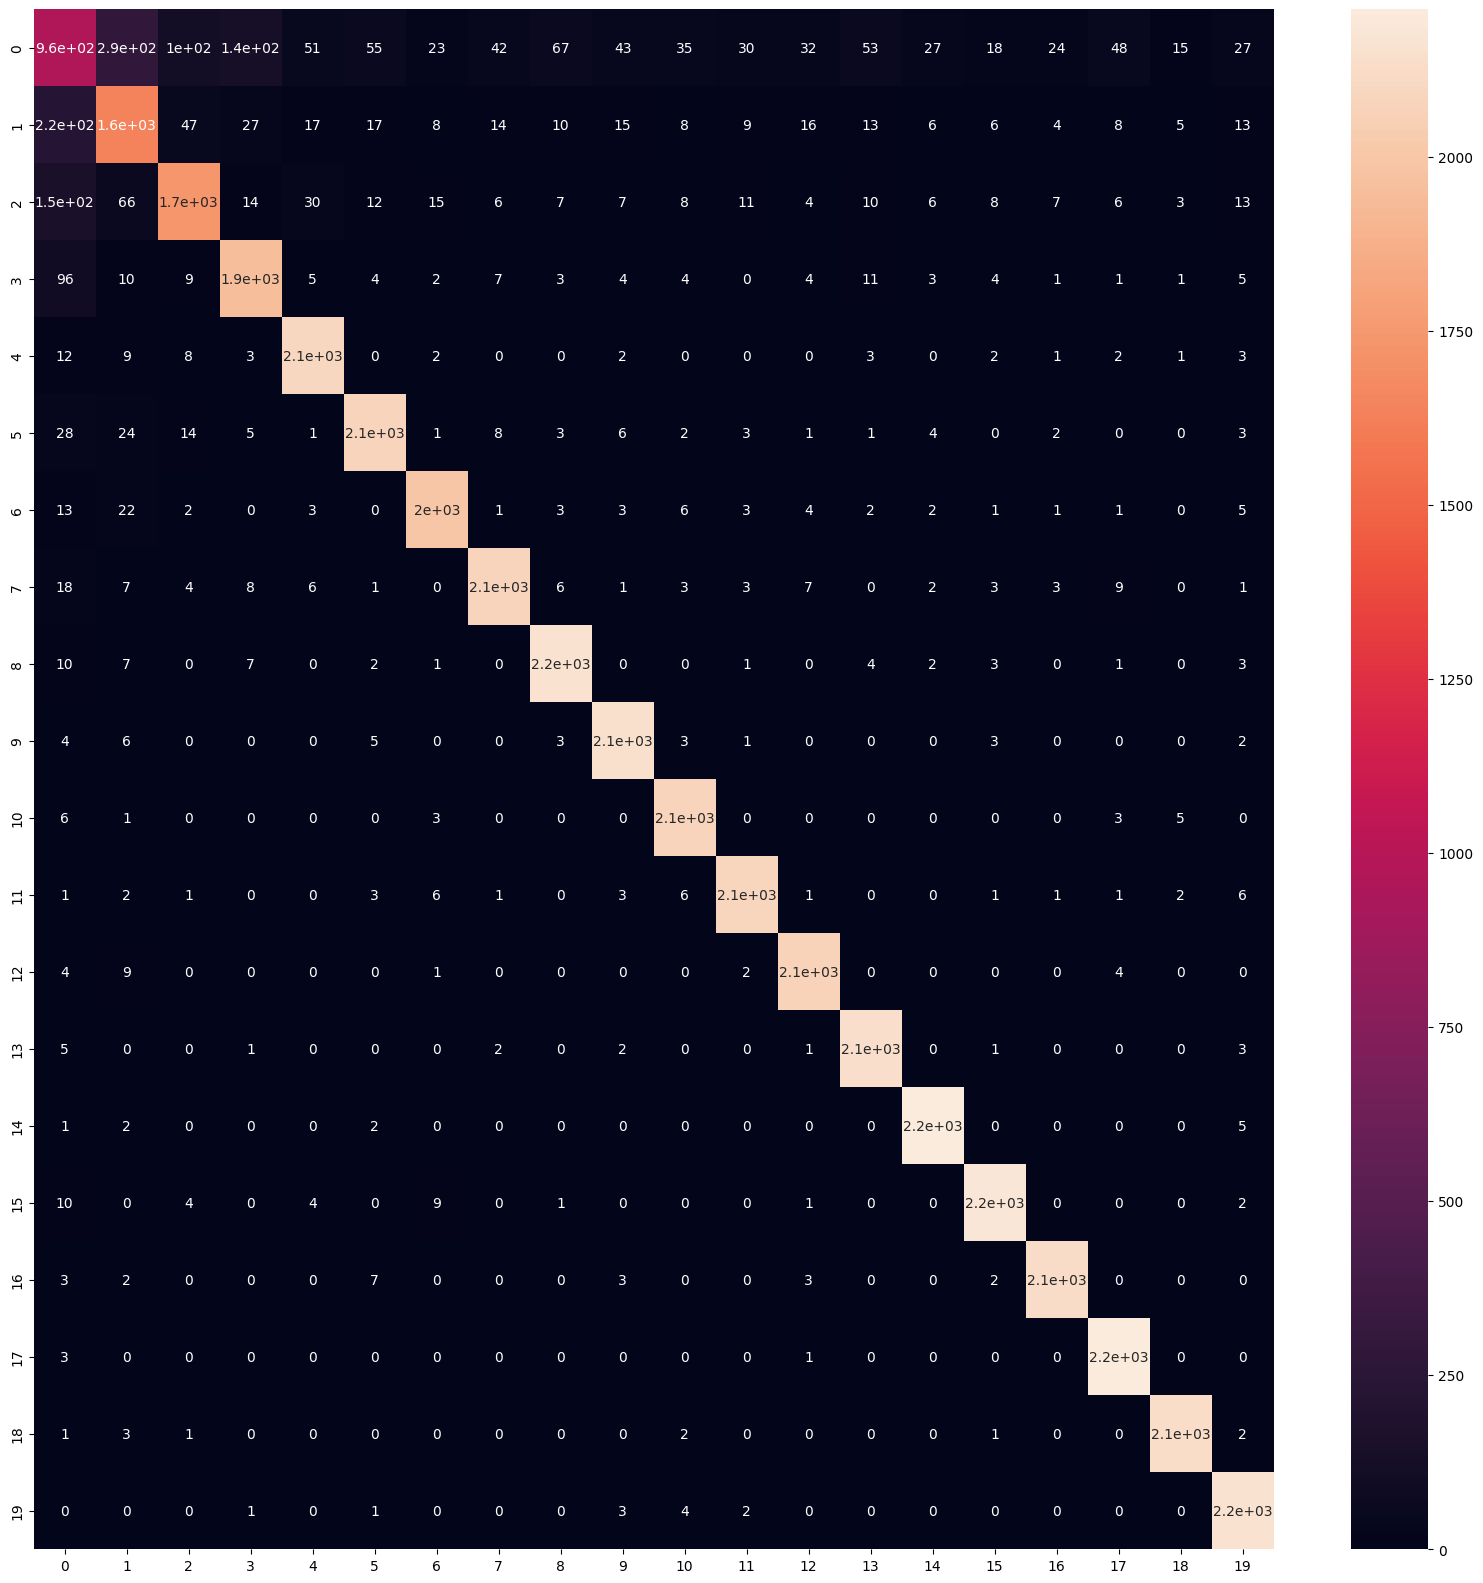

In [130]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20,20))
mat = confusion_matrix(y_tasty, bread)
sns.heatmap(mat, annot=True)                                                                   
plt.show()

Y-axis (vertical axis): True labels or actual classes. Each row in the confusion matrix corresponds to a true class.

X-axis (horizontal axis): Predicted labels or predicted classes. Each column in the confusion matrix corresponds to a predicted class.

# labels
0	❤️	 Red heart	
1	😍	 Smiling face with hearteyes	
2	😂	 Face with tears of joy	
3	💕	 Two hearts
4	🔥	 Fire
5	😊	 Smiling face with smiling eyes	
6	😎	 Smiling face with sunglasses	
7	✨	 Sparkles 	
8	💙	 Blue heart
9	😘	 Face blowing a kiss	
10	📷	 Camera	
11	🇺🇸	 United States	
12	☀️	 Sun
13	💜	 Purple heart 	
14	😉	 Winking face	
15	💯	 Hundred points	
16	😁	 Beaming face with smiling eyes	
17	🎄	Christmas tree	
18	📸	Camera with flash
19	😜	Winking face with tongue	

As we can see from the heat map that the model mostly confuses over 0,1 and 3 classes which are very similar to each other as we can see from labels so it can be taken lightly, otherwise the model is pretty good.

In [138]:
model_tuned.save('tuned_model.h5')

ValueError: Unable to synchronously create dataset (name already exists)